### Adding Layers

Neural networks become deep thwnt hey have 2 or more hidden layers. In chapter 1, we only have 1 layer, being 3 neurons. We connected the inputs (which contains 4 features) with these 3 neurons, so that each features connects to all of the 3 neurons. Thus we have 12 connections in total,  which shoudl match the total number of weights:

> 3 sets of 4 weights, each weight in the set corresponding to each input in the NN. This is why the shape of the inital weights were (3,4)

To create a new hidden layer we will copy and paste the weights and biases to weights2 and biases2, and change their values to new made up sets.

In [122]:
import numpy as np

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]
         ]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]
          ]

biases = [2.0, 3.0, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


Whats going on here?

* we compute the outputs for layer 1 by doing the matrix product of the inputs and the weights, keeping in mind that the weights matrix has to be transposed so that the row in the inputs matrix can be dot product with the column of the weights. We then add each of the result by the bias, so that the resultant is a (3,3) matrix, each row in the matrix being each neuron, and each neuron containing 3 values, the values of the dot product between the row of inputs and the column of weights1.

* we then compute the outputs for layer 2 by doing the matrix product of the first layer and the weight2, keeping in mind that the weight2 matrix has to be transposed for that the row in layer1 can be dot product with the columns of the weights. Then we add the result by the bias, so that the resultant matrix is a (3,3) matrix, each row in tha matrix being each neuron, and each neuron containing 3 values, the values of the dot product between the row of layer1 and the column of weights2

### Training data

lets use a function to create non-linear data. 

> non-linear data is data that cannot be represented in a straight line.

> we can install nnfs, which is a custom package made specifically for this book, which will be used to generate data. For example:

            from nnfs.datasets import spiral_data

* this will import the dataset used to create a spiral.

Remember that you will not be typically generating training data from a function for your neural networks. Instead, you will have an actual dataset. This is just used for convenience.

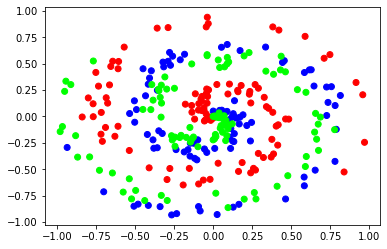

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

'''this line of code sets the random seed to 0, creates a float32 datatype, and overrides the original
dot product from NumPy.'''
nnfs.init()

X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

the code aboves imports the spiral_data dataset from nnfs, to generate a spiral dataset with 100 samples and 3 classes. 

the function returns X, and y, with X being a 2d array containing the input data, and y being a 1d aray containing the labels for each sample.

it then creates a scatter plot to plot the first two columns of X.

* c indicates that the the color of the points in the plot is determined by the values in y

* cmap is ised to set the color map used to color the points in the scatter plot (blue, red, green)

### Dense Layer Class

a ***dense layer*** is simply a fully connected layer: each input or neuron in one layer is connected to each output or neuron in the succeeding layer. Also denoted as *fc*

In [124]:
class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        #initalize the weights and biases. 
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    #forward pass
    def forward(self, inputs):
        #calculate the output values from the inputs, weights and biases.
        pass


Dense_Layer class is created:

>we initialize the weights as a 2D array of the shape (n_inputs, n_neurons), with each value in the array being a random value from the standard normal distribution.

* values will be between -1 and 1, with mean being close to 0.
* we multiply this distribution of weights by 0.01, to makes the values for each weight smaller, so that it takes less time to fit the data

>we initialize the biases as a 2D array of the shape (1, n_neurons), with each value in the array being 0.

> forward pass is the function used to compute the output values. It takes in the inputs (which will be an array), and perform the necessary calculations.

Notice how we are initalizing the weights to be (inputs, neurons) instead of (neurons, inputs). This is so that we wont have to transpose everytime we perfom the forward pass.

Lets see an example of how our method initalizes the weights and the biases:

In [125]:
import numpy as np
import nnfs

nnfs.init()

n_inputs, n_neurons = 2, 4

weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros((1, n_neurons))

print(weights, '\n', weights.shape)
print(biases, '\n', biases.shape)

[[ 0.01764052  0.00400157  0.00978738  0.02240893]
 [ 0.01867558 -0.00977278  0.00950088 -0.00151357]] 
 (2, 4)
[[0. 0. 0. 0.]] 
 (1, 4)


Lets now create code to the forward pass, which calculates the output layer using the dot product of the inputs and the weights. 

> each input is passed into the method, then dot product is performed between the inputs and the weights, with the bias added,

In [126]:
class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases    

Lets put this code all together and create an instance of the class 

In [129]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Dense_Layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

X, y = spiral_data(samples=100, classes=3)

dense1 = Dense_Layer(2, 3)

dense1.forward(X)

print('shape of the inputs: ', X.shape,'\ntwo inputs (features), each having 300 samples.\n')
print(dense1.output[:5])
print('shape of the output layer: ', dense1.output.shape,'\neach of the 3 neurons contains values for 300 samples ')

shape of the inputs:  (300, 2) 
two inputs (features), each having 300 samples.

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]
shape of the output layer:  (300, 3) 
each of the 3 neurons contains values for 300 samples 


In [133]:
'''Creation of a 4 x 3 network, 4 being the number of inputs, and 3 being the number of neurons'''

#creation of neural network class:
class NN: 
    def __init__(self, n_features, n_neurons):
        self.weights = 0.01 * np.random.randn(n_features, n_neurons)
        self.bias = np.zeros((1, n_neurons))

    def forward(self, samples):
        self.output = np.dot(samples, self.weights) + self.bias

#inputs, this is a simple sample of 4 features. (features is # elements)
X = [1,2,3,4]       

#this is a batch of 10 samples, 
B = np.random.randint(1,11, size=(10,4))

#we need to make X into a matrix (its now a vector)
X = np.array(X)
print('This is the shape of the input: ', X, X.shape)
X = X.reshape(1, -1)
print('This is the shape of X now: ', X, X.shape)


#lets create an instance of the NN class and get the weights
neural = NN(4, 3)
print('This is the weights array: \n', neural.weights)
print('This is the shapes of the weights: ', neural.weights.shape)

neural.forward(X)

print('Output layer: ', neural.output)

print("This is B: \n", B)

neural.forward(B)

print('Output layer: \n', neural.output)
print('Output layer shape: ', neural.output.shape)


This is the shape of the input:  [1 2 3 4] (4,)
This is the shape of X now:  [[1 2 3 4]] (1, 4)
This is the weights array: 
 [[ 8.2158567e-03  5.2926462e-05  8.0056479e-03]
 [ 7.8260177e-04 -3.9522899e-03 -1.1594204e-02]
 [-8.5930765e-04  1.9429292e-03  8.7583270e-03]
 [-1.1510747e-03  4.5741559e-03 -9.6461195e-03]]
This is the shapes of the weights:  (4, 3)
Output layer:  [[ 0.00259884  0.01627376 -0.02749226]]
This is B: 
 [[ 4  3 10  4]
 [ 9  6  5  6]
 [ 2  6  9  3]
 [10 10  6  7]
 [ 5  1  9  6]
 [ 6  6  2  1]
 [ 1  1  1  1]
 [ 8  7  4  6]
 [ 5  4  5  6]
 [ 2  4  7  8]]
Output layer: 
 [[ 0.02201386  0.02608075  0.04623877]
 [ 0.06743533  0.01392218 -0.01159948]
 [ 0.00994033  0.00760094 -0.00366735]
 [ 0.07677121  0.00468303 -0.05085844]
 [ 0.02722167  0.04124364  0.04938226]
 [ 0.05112106 -0.01493617 -0.0136608 ]
 [ 0.00698808  0.00261772 -0.00447635]
 [ 0.06086139  0.00797403 -0.03995766]
 [ 0.03300671  0.02161505 -0.02043366]
 [ 0.00433837  0.03449044 -0.04622619]]
Output layer 